In [2]:
import torch 
from torch import autograd

In [2]:
x = torch.arange(4).type(torch.float)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad

False

In [4]:
x = x.requires_grad_()

In [5]:
x.requires_grad

True

In [6]:
x.detach().requires_grad

False

In [7]:
x.grad

# FORWARD
$$y = 2x^Tx $$

In [38]:
y = 2*x.dot(x.T)

In [27]:
y

tensor(28., grad_fn=<MulBackward0>)

# BACKWARD

In [39]:
y.backward()

In [29]:
y

tensor(28., grad_fn=<MulBackward0>)

# Получение градиента

In [30]:
x.grad

tensor([ 0., 12., 24., 36.])

In [31]:
4 * x == x.grad

tensor([ True, False, False, False])

In [45]:
y = 2 * x.dot(x.T)
print(y.grad_fn)
with torch.no_grad():
  y = 2 * x.dot(x)
  print(x.grad_fn)

None


In [47]:
y = 2 * x.dot(x.T)
print(y.grad_fn)
with torch.no_grad():
  y = 2 * x.dot(x)
  y.backward()
  
  print(x.grad_fn)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [52]:
x.norm()

tensor(3.7417, grad_fn=<CopyBackwards>)

# Гибкий граф

In [83]:
def f(a):
  b = a * 2
  while b.norm().item()< 1000:
    b = b * 2
  if b.sum().item() > 0:
    c = b
  else:
    c = 100 * b
  return c

In [84]:
a = torch.randn(1).requires_grad_()

In [85]:
a

tensor([-0.5259], requires_grad=True)

In [86]:
d = f(a)

In [87]:
d

tensor([-107705.9219], grad_fn=<MulBackward0>)

In [88]:
d.backward()

In [90]:
a

tensor([-0.5259], requires_grad=True)

# Практика

Пусть $f(x) = sin(x) * x$. Построит f(x) и f'(x)

In [91]:
from matplotlib import pyplot as plt

In [99]:
X = [w / 100.0 for w in range(-1000,1000)]

In [114]:
Y = []
Y_der = []
for x in X:
  xt = torch.Tensor((x,))
  xt.requires_grad_()
  y = torch.sin(xt) *xt
  y.backward()
  Y.append(y.item())
  Y_der.append(xt.grad.item())

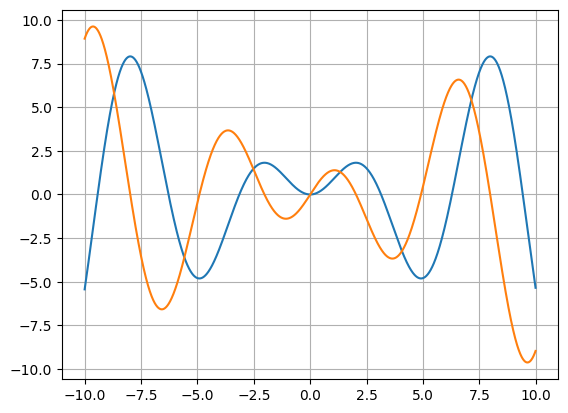

In [115]:
plt.plot(X,Y)
plt.plot(X,Y_der)
plt.grid()
plt.show()

<module 'seaborn' from '/home/seb/.local/lib/python3.10/site-packages/seaborn/__init__.py'>

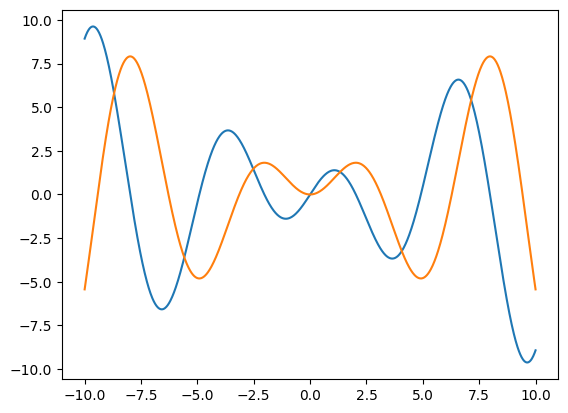

In [9]:
import seaborn as sns
def f(x):
  return torch.sin(x)*x
x = torch.linspace(-10,10,1000).requires_grad_()
y = f(x)
y.backward(torch.ones_like(y))
dx = x.grad
sns.lineplot(x = x.detach().numpy(), y = dx)
sns.lineplot(x = x.detach().numpy(),y = y.detach().numpy())
sns

<module 'seaborn' from '/home/seb/.local/lib/python3.10/site-packages/seaborn/__init__.py'>

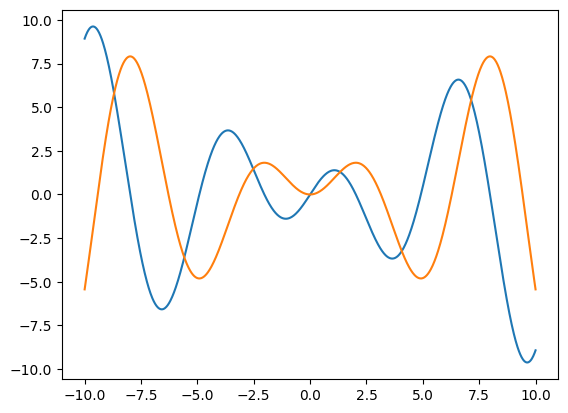

In [14]:
import seaborn as sns
def f(x):
  return torch.sin(x)*x
x = torch.linspace(-10,10,1000).requires_grad_()
y = f(x)
y2 = y.sum() 
y2.backward()
dx = x.grad
sns.lineplot(x = x.detach().numpy(), y = dx)
sns.lineplot(x = x.detach().numpy(),y = y.detach().numpy())
sns